In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import json
import pathlib
import matplotlib.pyplot as plt
import datetime as dt
# import ipywidgets as widgets
from soilgasflux_fcs import synthetic_create

(3154,)


/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/synthetic_create.py:161: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  cbar4 = fig.colorbar(rel_dcdt_diff_plot, ax=ax[1,1])
/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/synthetic_create.py:171: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/Users/alexnaokiasatokobayashi/git/soilgasflux_fcs/notebooks/../soilgasflux_fcs/synthetic_create.py:171: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


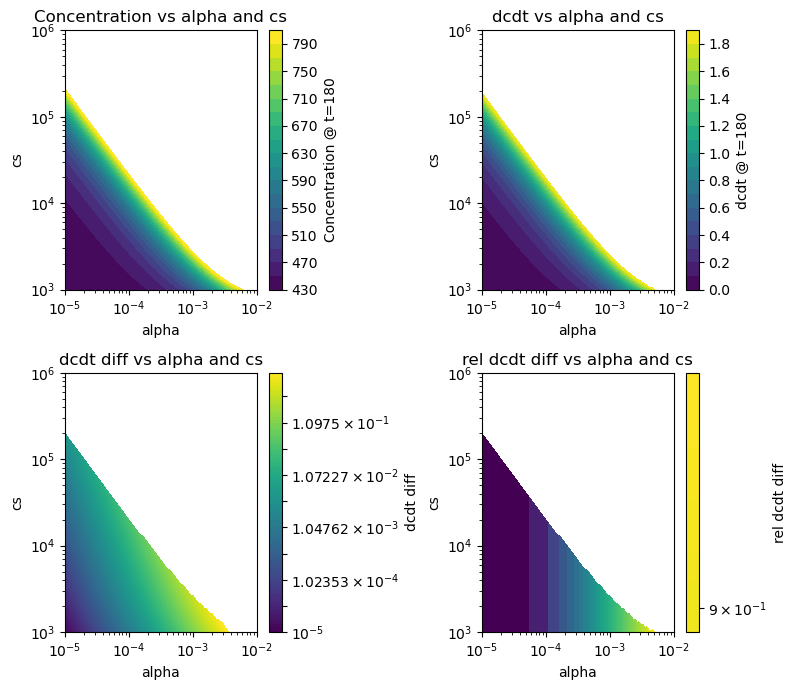

In [100]:
a = synthetic_create.Generator(total_time=180, c0=430)
a.alpha_cs_plot(alpha_min=1e-5, alpha_max=1e-2,
                cs_min=1e3, cs_max=1e6,
                n=100)

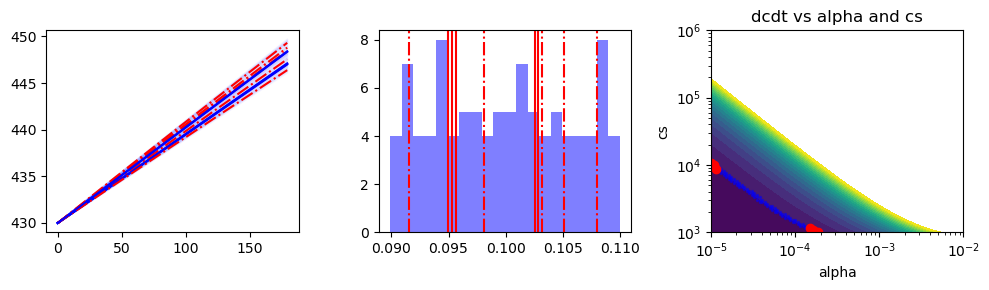

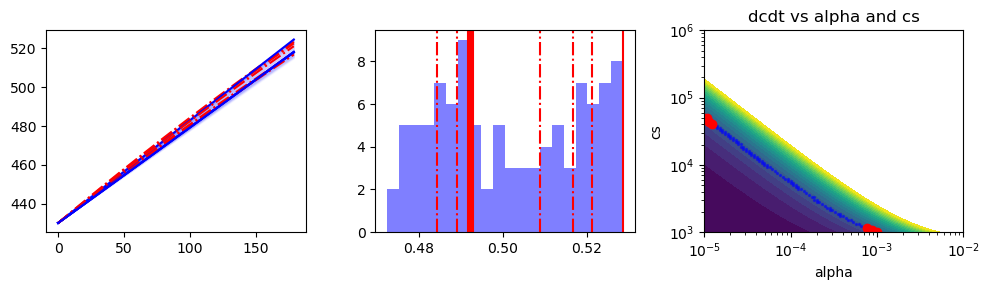

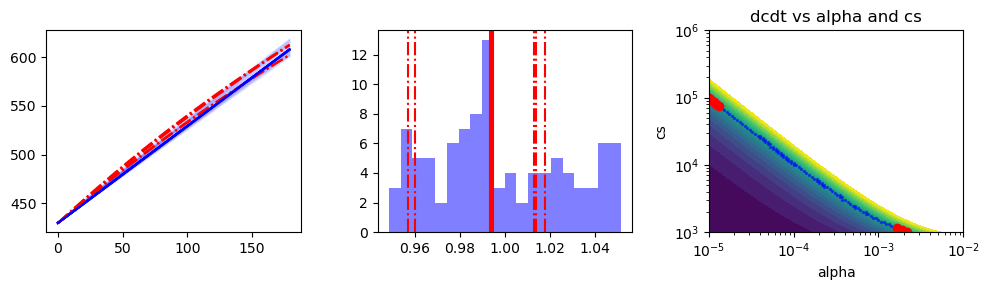

In [104]:
for dcdt in [0.1, 0.5, 1.0]:
    a.cc_curve_plot(selected_dcdt=dcdt)

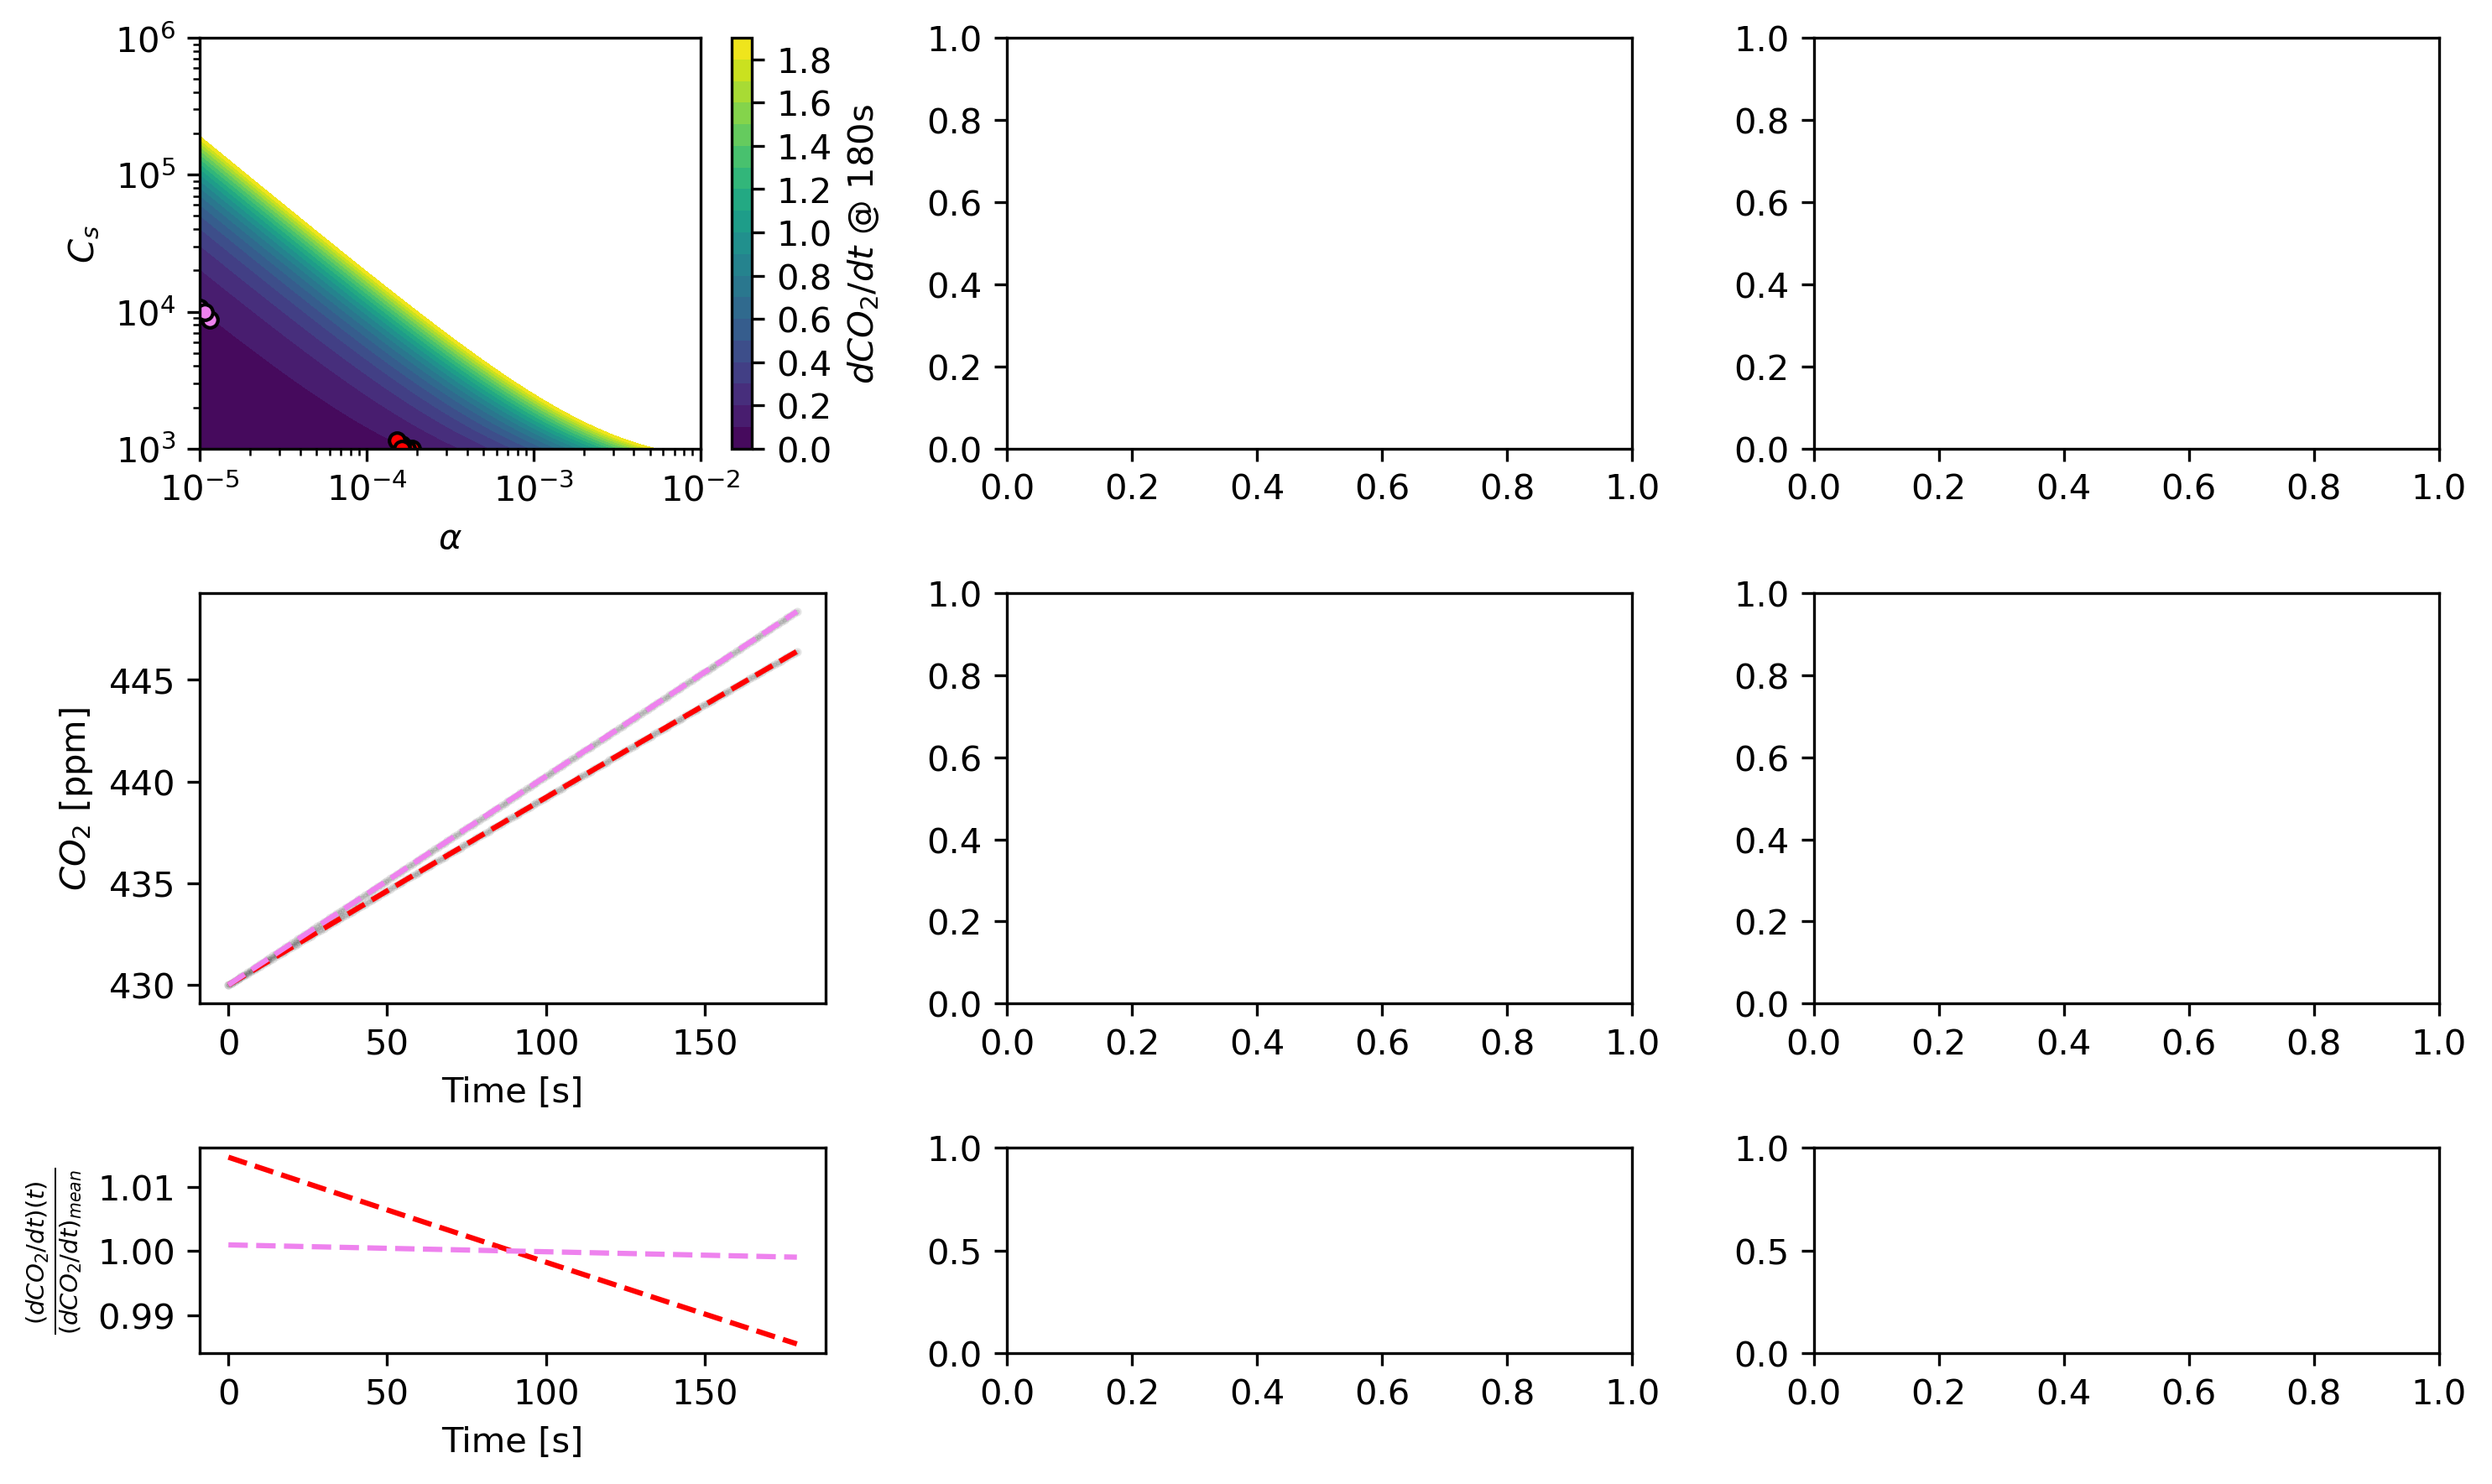

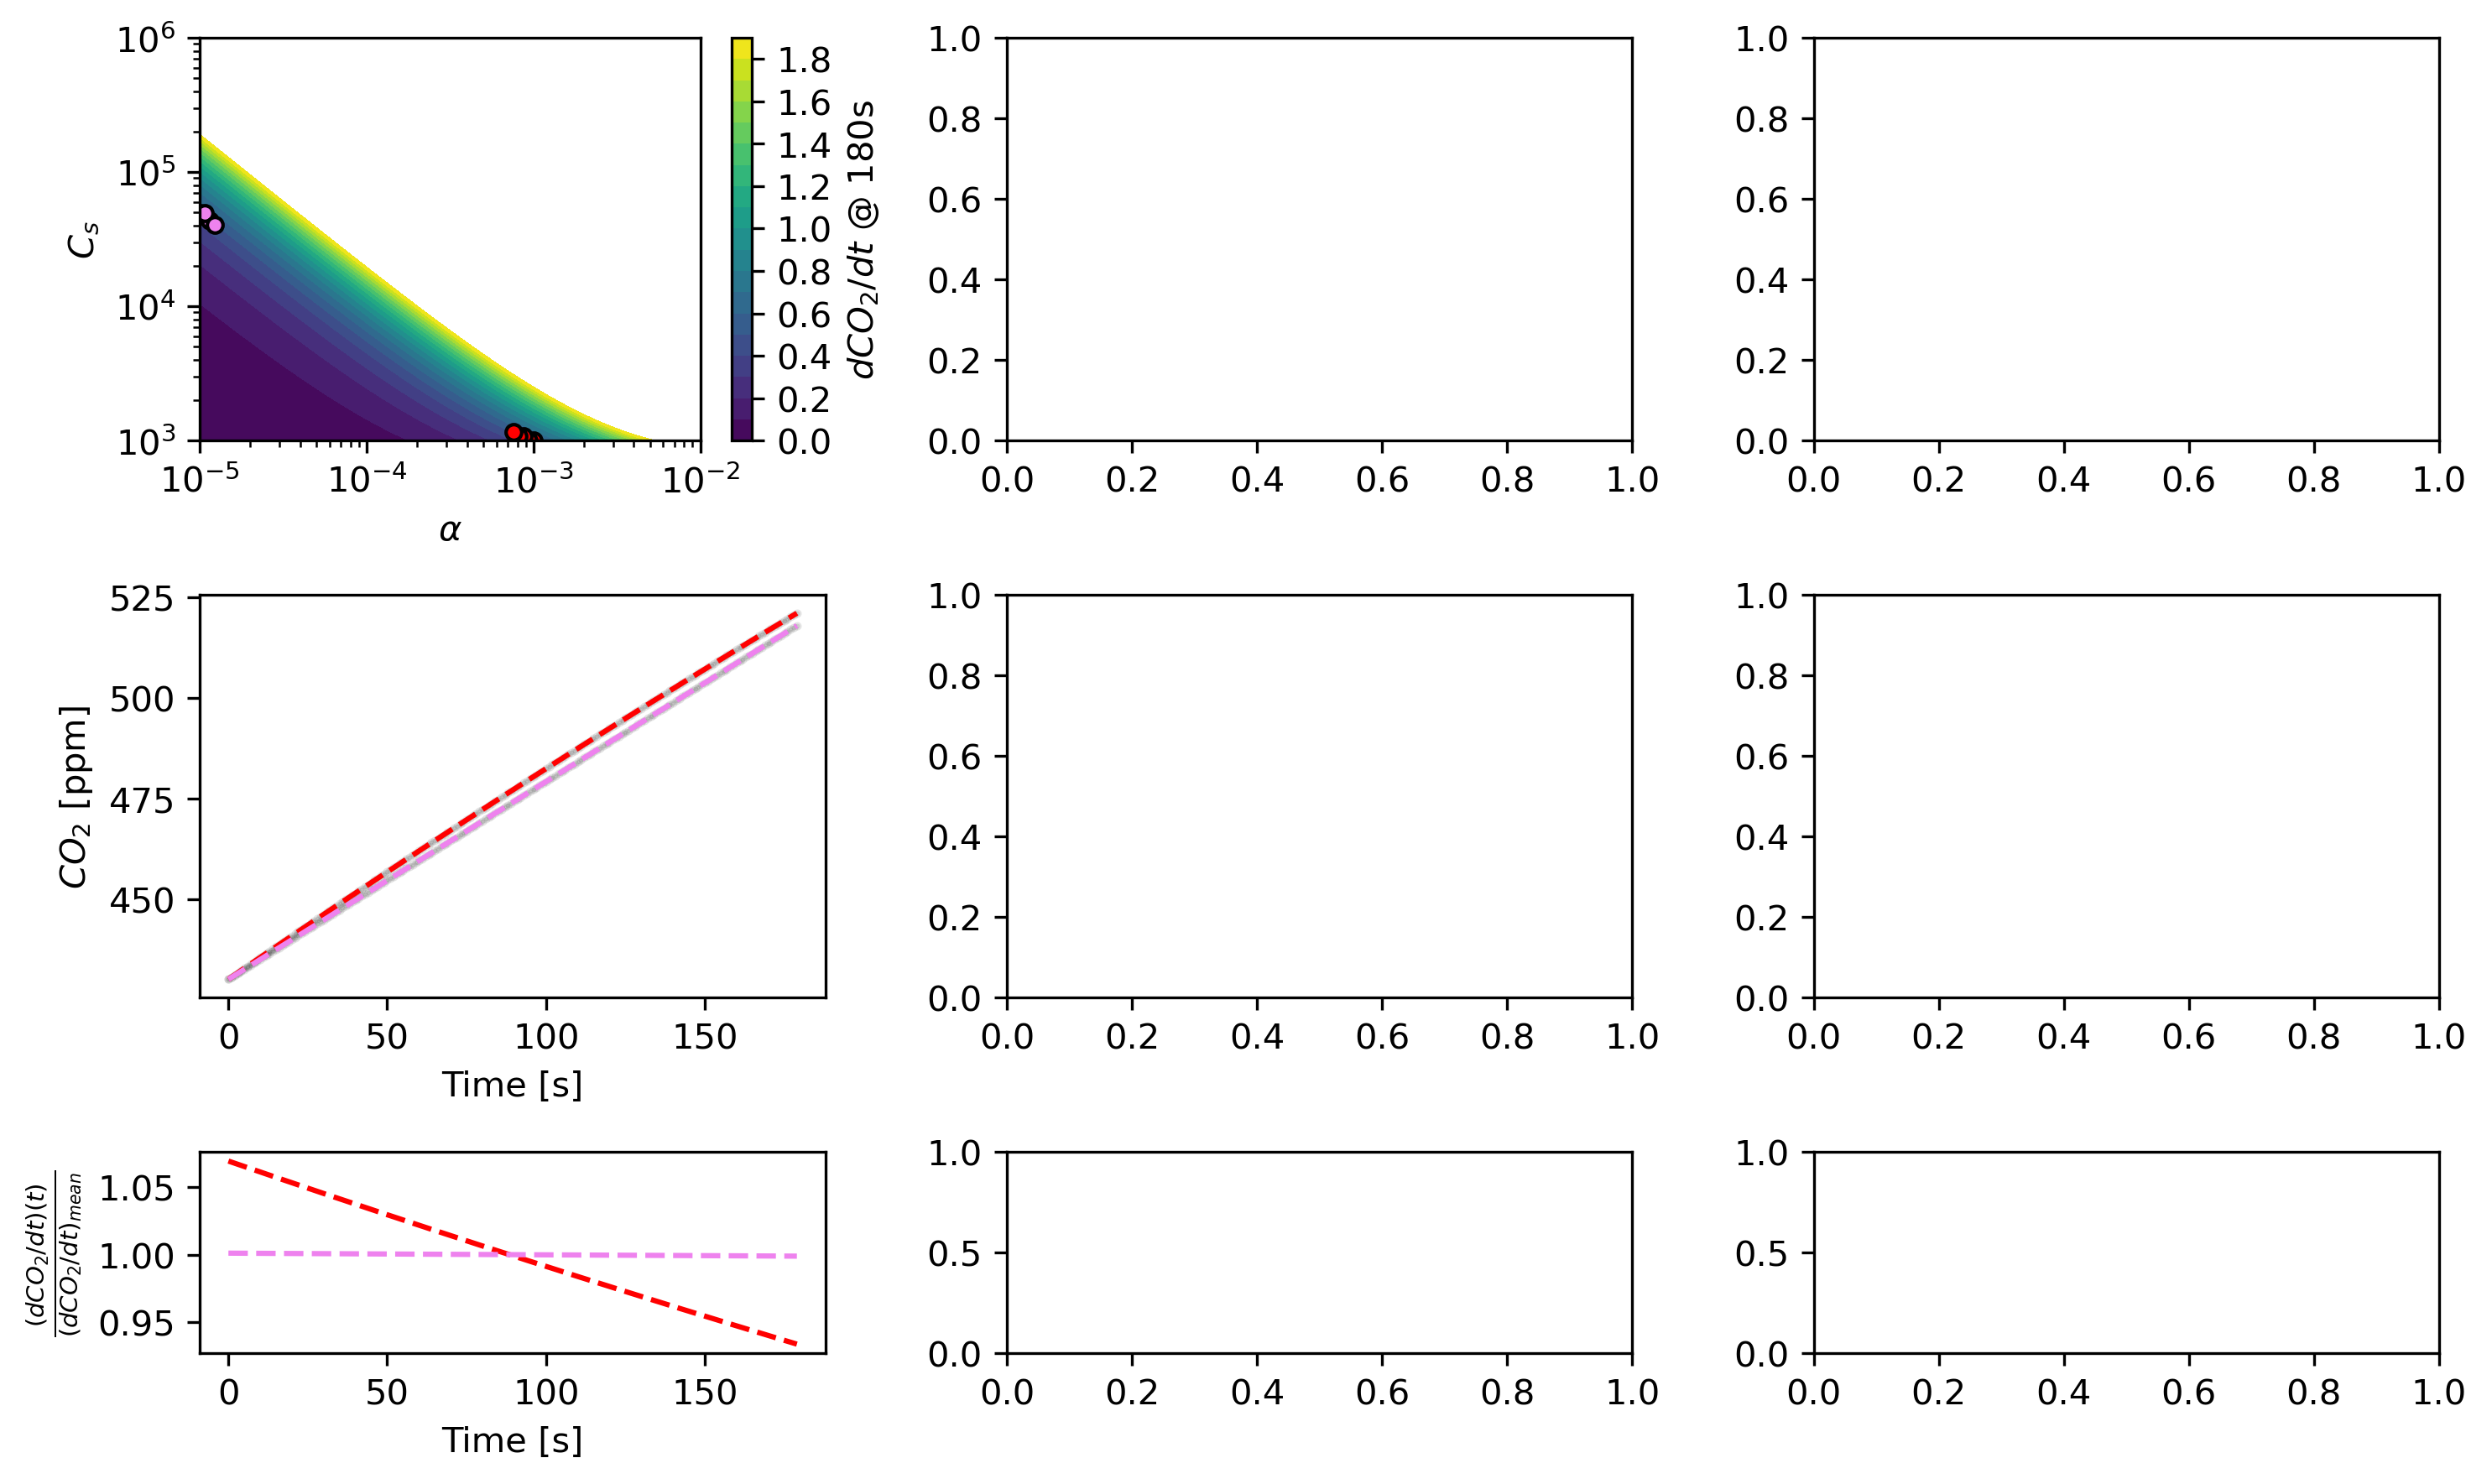

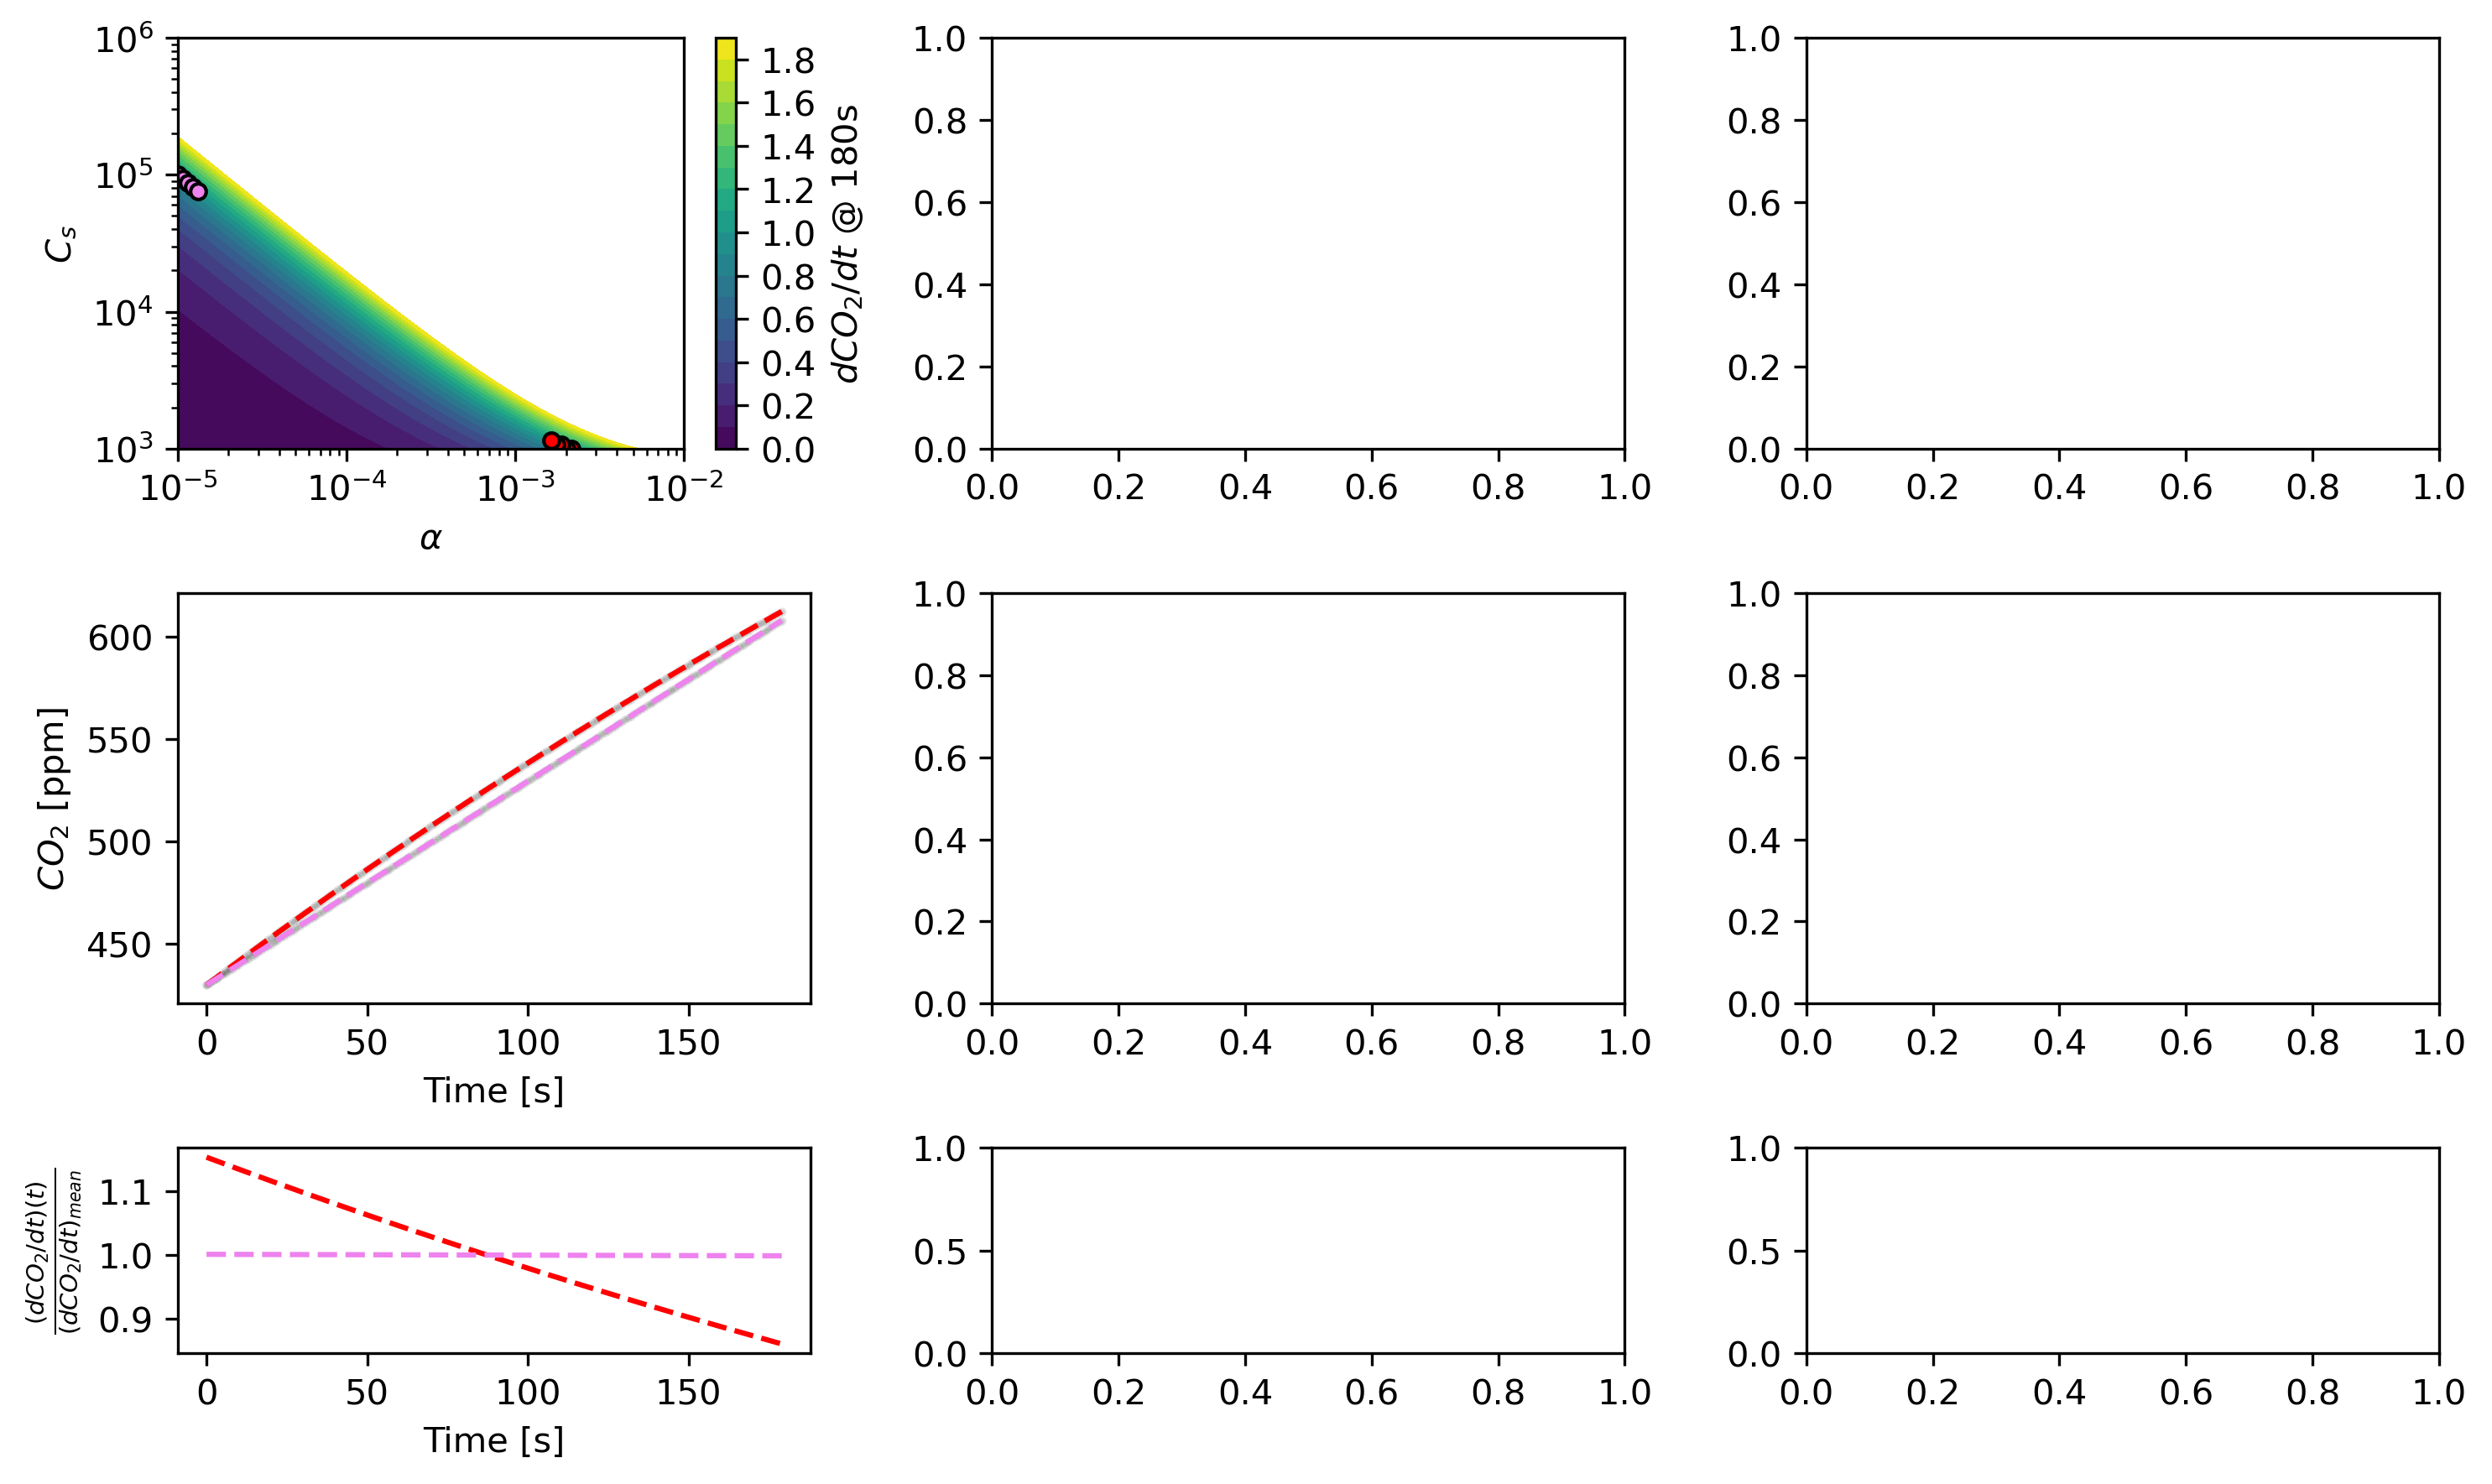

In [ ]:

for dcdt in [0.1, 0.5, 1.0]:
    a.cc_curve_plot2(list_selected_dcdt=[dcdt])
    alpha, cs, c0, aa, cc, dcdt, top_n_big_curve, top_n_straight_curve = a._alldata()

In [7]:
from soilgasflux_fcs import simulate_sensor

In [11]:
# files_folder = r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/'
# folder_toSave = r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/chamberHeight30/test08'
files_folder = r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test05'
folder_toSave = r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/chamberHeight30/test08/'
for file in pathlib.Path(files_folder).glob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    print(file)
    concentration_ppm = data['raw_data']['k30_co2']
    source_ppm = np.diff(np.array(concentration_ppm))


    total_time = len(data['raw_data']['k30_co2'])
    sim = simulate_sensor.Simulate_Sensor(alpha=1e-4, 
                                          cs=1e4, c0=430, t0=0, 
                                          total_time=total_time,
                                          dt=1)
    sim.chamber_settings(area=np.pi*20**2/4, chamber_volume=np.pi*20**2/4*30)
    sim.internal_pump_settings(pump_volume=1, pump_rate=250)
    sim.additional_settings(volume=20)
    sim.gasAnalyzer_settings(response_time=1, 
                            gasAnalyzer_volume=30, 
                            sensor_accuracy=0.1, sensor_precision=0.5)
    final = sim.run_simulation(source_ppm=source_ppm, 
                   with_diffusion=True, 
                   with_advection=True, 
                   verbose=False)
    data['raw_data']['k30_co2'] = list(final)

    with open(folder_toSave + file.name, 'w') as f:
        json.dump(data, f)


/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test05/2025-5-8_15-52-56.json
Chamber settings: area=314.159 cm2, volume=9424.778 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=1.000 s, volume=30.000 cm3, accuracy=0.100 ppm, precision=0.500 ppm
/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test05/2025-5-8_16-13-56.json
Chamber settings: area=314.159 cm2, volume=9424.778 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=1.000 s, volume=30.000 cm3, accuracy=0.100 ppm, precision=0.500 ppm
/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test05/2025-5-8_16-25-56.json
Chamber settings: area=314.159 cm2, volume=9424.778 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=1.000 s, volume=30.000 cm3, accur

In [12]:
# files_folder = r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test05/'
# folder_toSave = r'/Users/alexnaokiasatokobayashi/Documents/data/synthetical/test07/'
files_folder = r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test05'
folder_toSave = r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/chamberHeight30/test09/'
for file in pathlib.Path(files_folder).glob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    print(file)
    concentration_ppm = data['raw_data']['k30_co2']
    source_ppm = np.diff(np.array(concentration_ppm))


    total_time = len(data['raw_data']['k30_co2'])
    sim = simulate_sensor.Simulate_Sensor(alpha=1e-4, 
                                          cs=1e4, c0=430, t0=0, 
                                          total_time=total_time,
                                          dt=1)
    sim.chamber_settings(area=np.pi*20**2/4, chamber_volume=np.pi*20**2/4*30)
    sim.internal_pump_settings(pump_volume=1, pump_rate=250)
    sim.additional_settings(volume=20)
    sim.gasAnalyzer_settings(response_time=20, 
                            gasAnalyzer_volume=30, 
                            sensor_accuracy=0.1, sensor_precision=1.5)
    final = sim.run_simulation(source_ppm=source_ppm, 
                   with_diffusion=True, 
                   with_advection=True, 
                   verbose=False)
    data['raw_data']['k30_co2'] = list(final)

    with open(folder_toSave + file.name, 'w') as f:
        json.dump(data, f)


/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test05/2025-5-8_15-52-56.json
Chamber settings: area=314.159 cm2, volume=9424.778 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=20.000 s, volume=30.000 cm3, accuracy=0.100 ppm, precision=1.500 ppm
/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test05/2025-5-8_16-13-56.json
Chamber settings: area=314.159 cm2, volume=9424.778 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=20.000 s, volume=30.000 cm3, accuracy=0.100 ppm, precision=1.500 ppm
/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test05/2025-5-8_16-25-56.json
Chamber settings: area=314.159 cm2, volume=9424.778 cm3
Internal Pump settings: volume=1.000 cm3, rate=250.000 cm3/s
Additional settings: volume=20.000 cm3
Gas Analyzer settings: response_time=20.000 s, volume=30.000 cm3, ac

In [92]:
folder_base = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test05/')

folder_Commercial = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test06/')
folder_Commercial_height30 = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/chamberHeight30/test08/')

folder_LowCost = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/test07/')
folder_LowCost_height30 = pathlib.Path(r'/Users/alexnaokiasatokobayashi/Documents/FCS/raw_data/chamberHeight30/test09/')

In [93]:
df_base = pd.DataFrame()
for file in folder_base.rglob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['raw_data'])
    df['id'] = file.name
    df['alpha'] = data['config']['alpha']
    df['cs'] = data['config']['c_s']
    df['c0'] = data['config']['c_c0']
    df['t0'] = data['config']['t0']
    df['curvature'] = data['config']['curvature']  
    df_base = pd.concat([df_base, df], axis=0)

df_commercial = pd.DataFrame()
for file in folder_Commercial.rglob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['raw_data'])
    df['id'] = file.name
    df['alpha'] = data['config']['alpha']
    df['cs'] = data['config']['c_s']
    df['c0'] = data['config']['c_c0']
    df['t0'] = data['config']['t0']
    df['curvature'] = data['config']['curvature']
    df_commercial = pd.concat([df_commercial, df], axis=0)

df_lowcost = pd.DataFrame()
for file in folder_LowCost.rglob('*.json'):
    with open(file, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data['raw_data'])
    df['id'] = file.name
    df['alpha'] = data['config']['alpha']
    df['cs'] = data['config']['c_s']
    df['c0'] = data['config']['c_c0']
    df['t0'] = data['config']['t0']
    df['curvature'] = data['config']['curvature']
    df_lowcost = pd.concat([df_lowcost, df], axis=0)

In [94]:
# for file in folder_Commercial_height30.rglob('*.json'):
#     with open(file, 'r') as f:
#         data = json.load(f)
#     df = pd.DataFrame(data['raw_data'])
#     df['id'] = file.name+ '_height30'
#     df['alpha'] = data['config']['alpha']
#     df['cs'] = data['config']['c_s']
#     df['c0'] = data['config']['c_c0']
#     df['t0'] = data['config']['t0']
#     df['curvature'] = data['config']['curvature']
#     df_commercial = pd.concat([df_commercial, df], axis=0)

# for file in folder_LowCost_height30.rglob('*.json'):
#     with open(file, 'r') as f:
#         data = json.load(f)
#     df = pd.DataFrame(data['raw_data'])
#     df['id'] = file.name+ '_height30'
#     df['alpha'] = data['config']['alpha']
#     df['cs'] = data['config']['c_s']
#     df['c0'] = data['config']['c_c0']
#     df['t0'] = data['config']['t0']
#     df['curvature'] = data['config']['curvature']
#     df_lowcost = pd.concat([df_lowcost, df], axis=0)

In [95]:
df_lowcost['curvature'].unique()

array(['big', 'straight'], dtype=object)

In [96]:
for i in df_lowcost['id'].unique():
    df = df_lowcost[df_lowcost['id'] == i]
    max_co2 = df['k30_co2'].max()
    min_co2 = df['k30_co2'].min()
    if max_co2 - min_co2 < 60:
        df_lowcost.loc[df_lowcost['id']==i, 'intensity'] = 'low'
    elif (max_co2 - min_co2 < 120)& (max_co2 - min_co2 >= 60):
        df_lowcost.loc[df_lowcost['id']==i, 'intensity'] = 'medium'
    elif max_co2 - min_co2 >= 120:
        df_lowcost.loc[df_lowcost['id']==i, 'intensity'] = 'high'

for i in df_commercial['id'].unique():
    df = df_commercial[df_commercial['id'] == i]
    max_co2 = df['k30_co2'].max()
    min_co2 = df['k30_co2'].min()
    if max_co2 - min_co2 < 60:
        df_commercial.loc[df_commercial['id']==i, 'intensity'] = 'low'
    elif (max_co2 - min_co2 < 120)& (max_co2 - min_co2 >= 60):
        df_commercial.loc[df_commercial['id']==i, 'intensity'] = 'medium'
    elif max_co2 - min_co2 >= 120:
        df_commercial.loc[df_commercial['id']==i, 'intensity'] = 'high'
for i in df_base['id'].unique():
    df = df_base[df_base['id'] == i]
    max_co2 = df['k30_co2'].max()
    min_co2 = df['k30_co2'].min()
    if max_co2 - min_co2 < 60:
        df_base.loc[df_base['id']==i, 'intensity'] = 'low'
    elif (max_co2 - min_co2 < 120)& (max_co2 - min_co2 >= 60):
        df_base.loc[df_base['id']==i, 'intensity'] = 'medium'
    elif max_co2 - min_co2 >= 120:
        df_base.loc[df_base['id']==i, 'intensity'] = 'high'

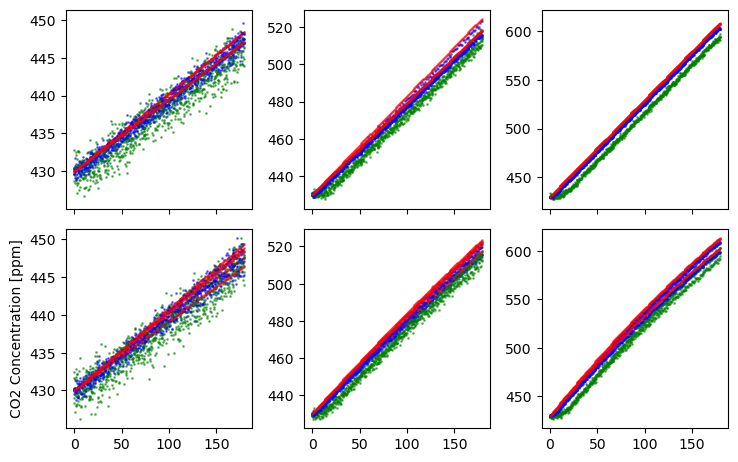

In [97]:
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(2, 3, figsize=(19*cm, 12*cm), sharey='col', sharex=True)
for intensity in df_lowcost['intensity'].unique():
    for curvature in df_lowcost['curvature'].unique():
        for i in df_lowcost['id'].unique():
            if i.endswith('_height30'):
                continue
            else:
                pass
            if intensity == 'low':
                j=0
            elif intensity == 'medium':
                j=1
            elif intensity == 'high':
                j=2
            
            if curvature == 'straight':
                k=0
            elif curvature == 'big':
                k=1
            df_l = df_lowcost[(df_lowcost['id'] == i) & 
                            (df_lowcost['intensity'] == intensity) & 
                            (df_lowcost['curvature'] == curvature)]
            df_c = df_commercial[(df_commercial['id'] == i) & 
                            (df_commercial['intensity'] == intensity) & 
                            (df_commercial['curvature'] == curvature)]
            df_b = df_base[(df_base['id'] == i) &
                            (df_base['intensity'] == intensity) & 
                            (df_base['curvature'] == curvature)]

            ax[k,j].scatter(df_l['datetime'], df_l['k30_co2'], 
                          color='green',alpha=0.5,s=1)
            ax[k,j].scatter(df_c['datetime'], df_c['k30_co2'],
                          color='blue',alpha=0.5, s=1)
            ax[k,j].scatter(df_b['datetime'], df_b['k30_co2'],
                          color='red',alpha=0.5, s=1)
            # ax[k,0].set_xlabel('Time')
            ax[1,0].set_ylabel('CO2 Concentration [ppm]')

    
fig.tight_layout()

In [98]:
df_lowcost

,datetime,datetime_utc,k30_co2,bmp_pressure,bmp_temperature,si_humidity,si_temperature,id,alpha,cs,c0,t0,curvature,intensity
0,0,2025-05-08 15:52:56,428.799665,99000.0,20.0,70.0,20.0,2025-5-8_15-52-56.json,0.00100,1000.0,430,0,big,medium
1,1,2025-05-08 15:52:57,428.797356,99000.0,20.0,70.0,20.0,2025-5-8_15-52-56.json,0.00100,1000.0,430,0,big,medium
2,2,2025-05-08 15:52:58,429.606391,99000.0,20.0,70.0,20.0,2025-5-8_15-52-56.json,0.00100,1000.0,430,0,big,medium
3,3,2025-05-08 15:52:59,429.765075,99000.0,20.0,70.0,20.0,2025-5-8_15-52-56.json,0.00100,1000.0,430,0,big,medium
4,4,2025-05-08 15:53:00,427.601386,99000.0,20.0,70.0,20.0,2025-5-8_15-52-56.json,0.00100,1000.0,430,0,big,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,2025-05-08 15:28:51,444.030882,99000.0,20.0,70.0,20.0,2025-5-8_15-25-56.json,0.00001,10000.0,430,0,straight,low
176,176,2025-05-08 15:28:52,445.635069,99000.0,20.0,70.0,20.0,2025-5-8_15-25-56.json,0.00001,10000.0,430,0,straight,low
177,177,2025-05-08 15:28:53,444.189859,99000.0,20.0,70.0,20.0,2025-5-8_15-25-56.json,0.00001,10000.0,430,0,straight,low
178,178,2025-05-08 15:28:54,445.145622,99000.0,20.0,70.0,20.0,2025-5-8_15-25-56.json,0.00001,10000.0,430,0,straight,low


In [99]:
import seaborn as sns

colors = sns.color_palette('coolwarm', n_colors=2)

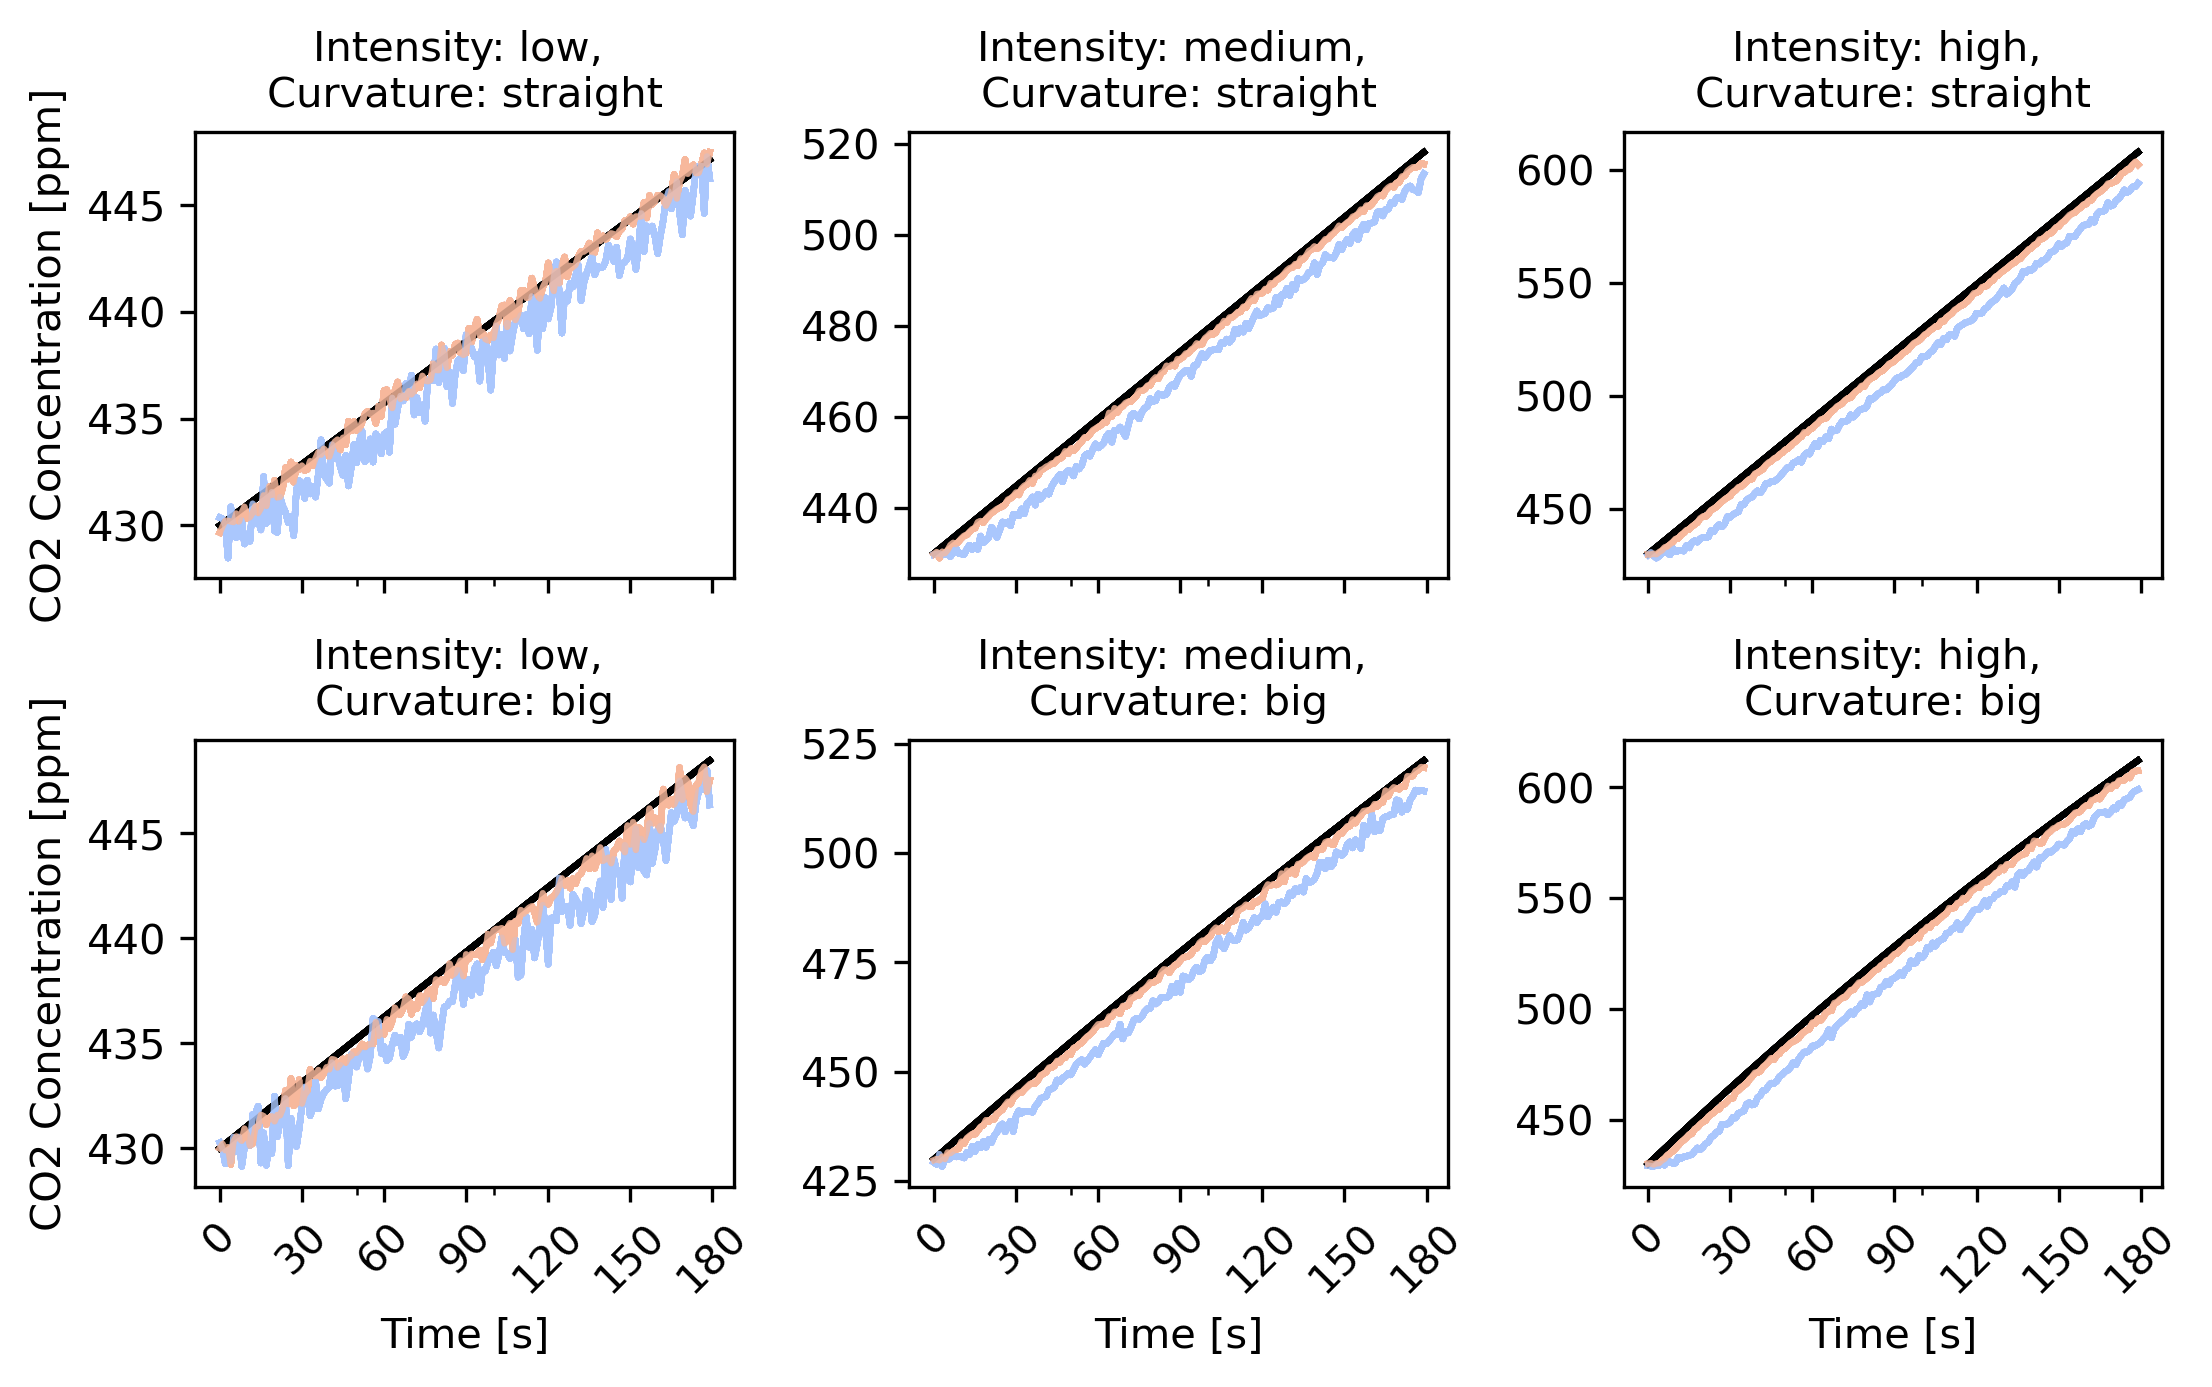

In [100]:
cm = 1/2.54  # centimeters in inches
fig, ax = plt.subplots(2, 3, figsize=(19*cm, 12*cm), sharex=True, dpi=300)
for intensity in df_lowcost['intensity'].unique():
    for curvature in df_lowcost['curvature'].unique():
        if intensity == 'low':
            j=0
        elif intensity == 'medium':
            j=1
        elif intensity == 'high':
            j=2
        
        if curvature == 'straight':
            k=0
        elif curvature == 'big':
            k=1
        for i in df_lowcost['id'].unique():
            if i.endswith('_height30'):
                continue
            else:
                df_b = df_base.groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()
                df_l = df_lowcost.groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()
                df_c = df_commercial.groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()

                df_b.loc[
                    df_b.index.get_level_values('intensity') == intensity,
                    df_b.index.get_level_values('curvature') == curvature].plot(ax=ax[k,j],
                                                                                label=i, color='black', alpha=0.5)
                df_l.loc[
                    df_l.index.get_level_values('intensity') == intensity,
                    df_l.index.get_level_values('curvature') == curvature].plot(ax=ax[k,j],
                                                                                label=i, color=colors[0], alpha=0.7)
                df_c.loc[
                    df_c.index.get_level_values('intensity') == intensity,
                    df_c.index.get_level_values('curvature') == curvature].plot(ax=ax[k,j],
                                                                                label=i, color=colors[1], alpha=0.7)



                ax[k,j].set_xticks(np.arange(0, 181, 30))
                ax[k,j].set_xticklabels(np.arange(0, 181, 30).astype(int), rotation=45)
                ax[k,j].set_xlabel('Time [s]')
                ax[k,j].set_title(f'Intensity: {intensity}, \nCurvature: {curvature}', fontsize=10)
                # ax[k,j].legend(title='Sensor ID', loc='upper left', bbox_to_anchor=(1, 1))
                ax[k,0].set_ylabel('CO2 Concentration [ppm]', fontsize=10)
                ax[k,0].set_ylabel('CO2 Concentration [ppm]', fontsize=10)
    
fig.tight_layout()

### Some statistics about it

Intensity: low, Curvature: big
	Noise (LowCost, lag-corrected): 0.82
	Noise (Commercial, lag-corrected): 0.40
	Signal (LowCost): 438.42
	Signal (Commercial): 439.02
		SNR (LowCost, lag-corrected): 537.48
		SNR (Commercial, lag-corrected): 1090.69
Intensity: medium, Curvature: big
	Noise (LowCost, lag-corrected): 1.03
	Noise (Commercial, lag-corrected): 0.55
	Signal (LowCost): 473.62
	Signal (Commercial): 476.01
		SNR (LowCost, lag-corrected): 457.91
		SNR (Commercial, lag-corrected): 864.22
Intensity: high, Curvature: big
	Noise (LowCost, lag-corrected): 1.18
	Noise (Commercial, lag-corrected): 0.68
	Signal (LowCost): 519.49
	Signal (Commercial): 524.17
		SNR (LowCost, lag-corrected): 439.57
		SNR (Commercial, lag-corrected): 773.51

##################################################
Intensity: low, Curvature: straight
	Noise (LowCost, lag-corrected): 0.80
	Noise (Commercial, lag-corrected): 0.37
	Signal (LowCost): 438.11
	Signal (Commercial): 438.68
		SNR (LowCost, lag-corrected): 549

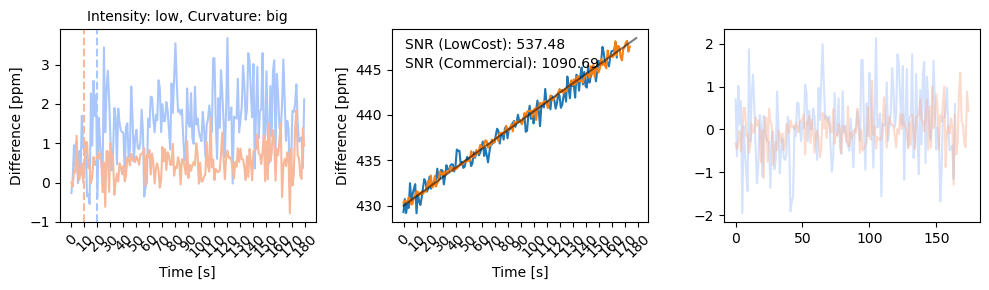

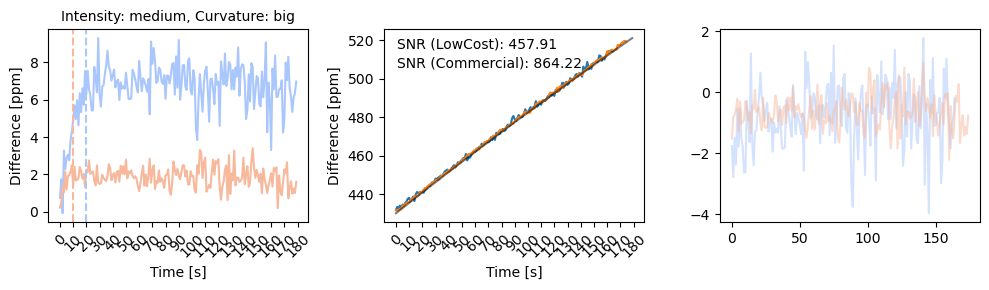

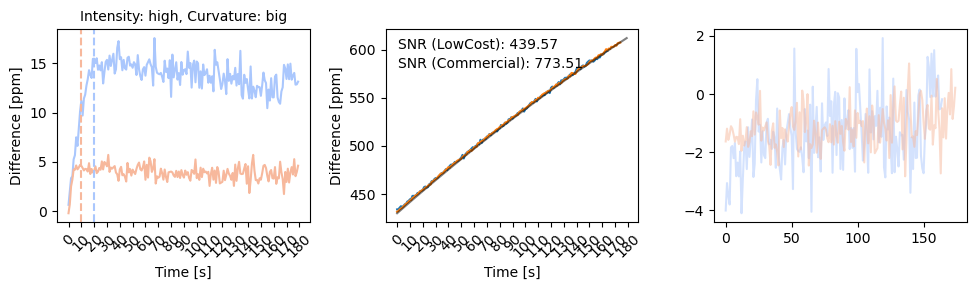

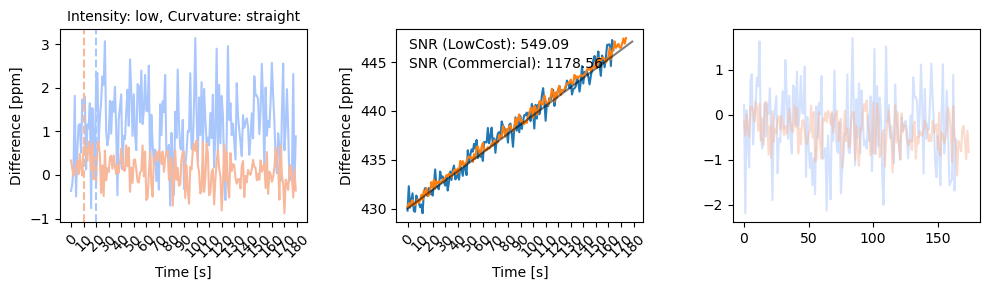

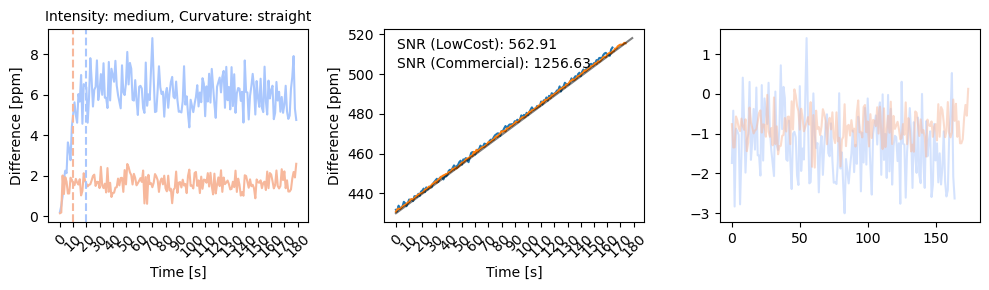

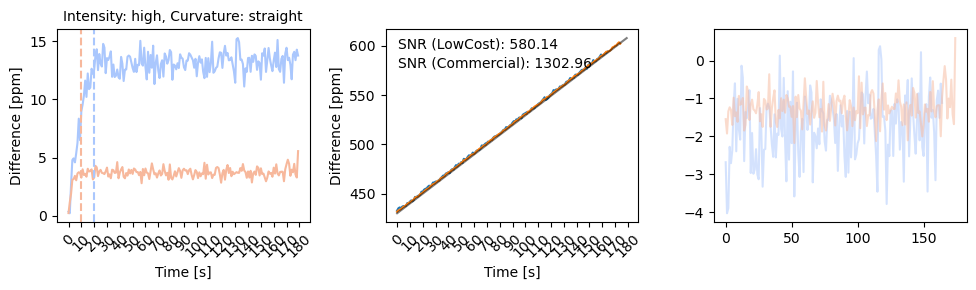

In [123]:
for curvature in df_lowcost['curvature'].unique():
    for intensity in ['low', 'medium', 'high']:
        print(f'Intensity: {intensity}, Curvature: {curvature}')
        # print()
        df_b = df_base.groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()
        df_l = df_lowcost.groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()
        df_c = df_commercial.groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()

        diff_b_l = df_b - df_l
        diff_b_c = df_b - df_c
        fig, ax = plt.subplots(1,3,figsize=(10, 3))
        diff_b_l_per = diff_b_l.loc[diff_b_l.index.get_level_values('intensity') == intensity,
                                    diff_b_l.index.get_level_values('curvature') == curvature]
        diff_b_c_per = diff_b_c.loc[diff_b_c.index.get_level_values('intensity') == intensity,
                                    diff_b_c.index.get_level_values('curvature') == curvature]
        # Align signals by lag (cross-correlation)
        base_curve = df_b.loc[(df_b.index.get_level_values('intensity') == intensity) &
                              (df_b.index.get_level_values('curvature') == curvature)].values
        lowcost_curve = df_l.loc[(df_l.index.get_level_values('intensity') == intensity) &
                                 (df_l.index.get_level_values('curvature') == curvature)].values
        commercial_curve = df_c.loc[(df_c.index.get_level_values('intensity') == intensity) &
                                    (df_c.index.get_level_values('curvature') == curvature)].values
        # Compute lag for lowcost
        # corr_l = np.correlate(base_curve - np.mean(base_curve), lowcost_curve - np.mean(lowcost_curve), mode='full')
        # lag_l = corr_l.argmax() - (len(lowcost_curve) - 1)
        
        # # Compute lag for commercial
        # corr_c = np.correlate(base_curve - np.mean(base_curve), commercial_curve - np.mean(commercial_curve), mode='full')
        # lag_c = corr_c.argmax() - (len(commercial_curve) - 1)
        
        # Shift curves to align
        def shift_curve(curve, lag):
            if lag > 0:
                return np.concatenate([np.full(lag, np.nan), curve[:-lag]])
            elif lag < 0:
                return np.concatenate([curve[-lag:], np.full(-lag, np.nan)])
            else:
                return curve
        # lowcost_aligned = shift_curve(lowcost_curve, lag_l)
        # commercial_aligned = shift_curve(commercial_curve, lag_c)
        lowcost_aligned = shift_curve(lowcost_curve, -15)
        commercial_aligned = shift_curve(commercial_curve, -5)
        # SNR calculation: signal = std(base), noise = std(base - aligned)
        noise_l = base_curve - lowcost_aligned
        noise_c = base_curve - commercial_aligned

        # signal_l = np.median(base_curve) if np.nanmean(base_curve) != 0 else np.nan
        # signal_c = np.median(base_curve) if np.nanmean(base_curve) != 0 else np.nan
        signal_l = np.nanmean(lowcost_aligned) 
        signal_c = np.nanmean(commercial_aligned)

        snr_l = signal_l / np.nanstd(noise_l) if np.nanstd(noise_l) != 0 else np.nan
        snr_c = signal_c / np.nanstd(noise_c) if np.nanstd(noise_c) != 0 else np.nan
        # snr_l = np.nanstd(base_curve) / np.nanstd(noise_l) if np.nanstd(noise_l) != 0 else np.nan
        # snr_c = np.nanstd(base_curve) / np.nanstd(noise_c) if np.nanstd(noise_c) != 0 else np.nan
        print(f'\tNoise (LowCost, lag-corrected): {np.nanstd(noise_l):.2f}')
        print(f'\tNoise (Commercial, lag-corrected): {np.nanstd(noise_c):.2f}')
        print(f'\tSignal (LowCost): {signal_l:.2f}')
        print(f'\tSignal (Commercial): {signal_c:.2f}')

        print(f'\t\tSNR (LowCost, lag-corrected): {snr_l:.2f}\n\t\tSNR (Commercial, lag-corrected): {snr_c:.2f}')

        ax[1].text(0.05, 0.9, f'SNR (LowCost): {snr_l:.2f}', transform=ax[1].transAxes, fontsize=10, color='k')
        ax[1].text(0.05, 0.8, f'SNR (Commercial): {snr_c:.2f}', transform=ax[1].transAxes, fontsize=10, color='k')

        
        # Plot as before
        diff_b_l_per.plot(ax=ax[0], color=colors[0])
        diff_b_c_per.plot(ax=ax[0], color=colors[1])

        ax[2].plot(noise_l, label='Low Cost Sensor Noise', color=colors[0], alpha=0.5)
        ax[2].plot(noise_c, label='Commercial Sensor Noise', color=colors[1], alpha=0.5)

        ax[0].set_title(f'Intensity: {intensity}, Curvature: {curvature}', fontsize=10)

        ax[1].plot(lowcost_aligned)
        ax[1].plot(commercial_aligned)
        ax[1].plot(base_curve, color='black', alpha=0.5)
        # ax[0].set_title('Low Cost Sensor')
        # ax[1].set_title('Commercial Sensor')
        ax[0].set_ylabel('Difference [ppm]')
        ax[1].set_ylabel('Difference [ppm]')
        ax[0].set_xlabel('Time [s]')
        ax[1].set_xlabel('Time [s]')
        ax[0].set_xticks(np.arange(0, 181, 10))
        ax[0].set_xticklabels(np.arange(0, 181, 10).astype(int), rotation=45)
        ax[1].set_xticks(np.arange(0, 181, 10))
        ax[1].set_xticklabels(np.arange(0, 181, 10).astype(int), rotation=45)
        ax[0].axvline(x=20, color=colors[0], linestyle='--')
        ax[0].axvline(x=10, color=colors[1], linestyle='--')
        fig.tight_layout()
        # fig.show()
    print()
    print('#' * 50)

In [102]:
import numpy as np

# Define stabilization threshold and window (customize as needed)
stab_threshold = 1.5  # ppm, adjust as appropriate
stab_window = 10      # number of time points

stabilization_times = {}

for intensity in df_lowcost['intensity'].unique():
    for curvature in df_lowcost['curvature'].unique():
        df_b = df_base.groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()
        df_l = df_lowcost.groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()
        df_c = df_commercial.groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()

        # Choose which curve to analyze (example: base)
        curve = df_b.loc[
            (df_b.index.get_level_values('intensity') == intensity) &
            (df_b.index.get_level_values('curvature') == curvature)
        ].values
        time = np.arange(len(curve))

        # Compute rolling std or diff
        rolling_std = pd.Series(curve).rolling(stab_window).std().to_numpy()
        # Find first index where rolling std stays below threshold
        stable_idx = np.where(rolling_std < stab_threshold)[0]
        if len(stable_idx) > 0:
            stab_time = time[stable_idx[0]]
        else:
            stab_time = np.nan
        stabilization_times[(intensity, curvature)] = stab_time
        print(f"Stabilization time for intensity={intensity}, curvature={curvature}: {stab_time} s")

# stabilization_times now contains the stabilization time for each (intensity, curvature) pair.

Stabilization time for intensity=medium, curvature=big: 130 s
Stabilization time for intensity=medium, curvature=straight: 9 s
Stabilization time for intensity=high, curvature=big: nan s
Stabilization time for intensity=high, curvature=straight: nan s
Stabilization time for intensity=low, curvature=big: 9 s
Stabilization time for intensity=low, curvature=straight: 9 s


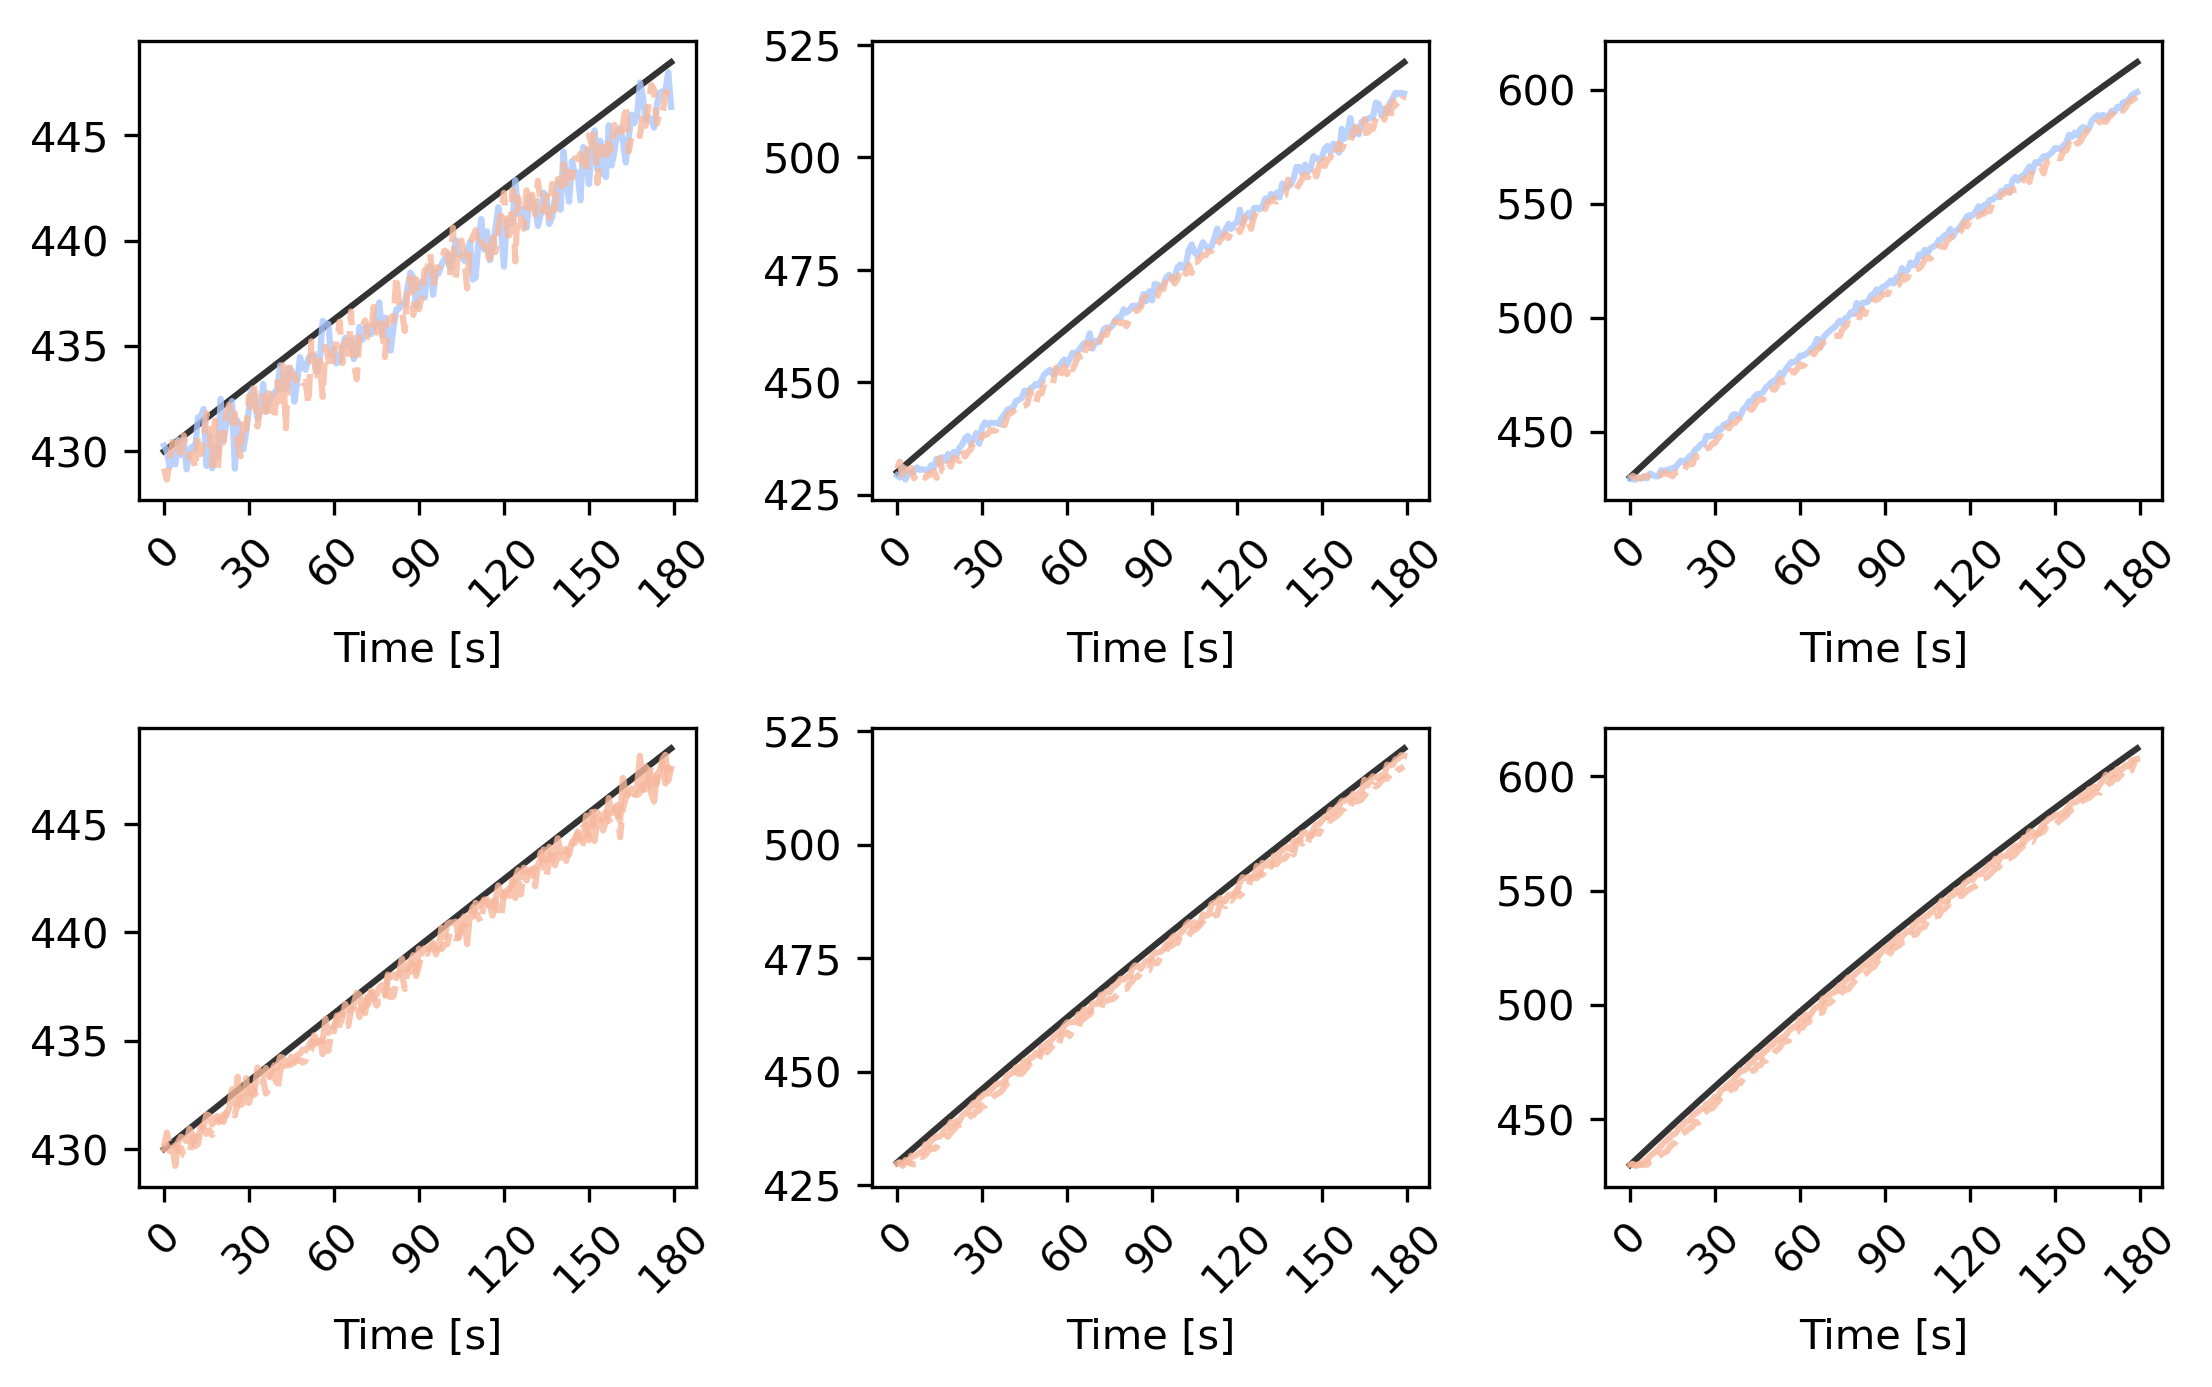

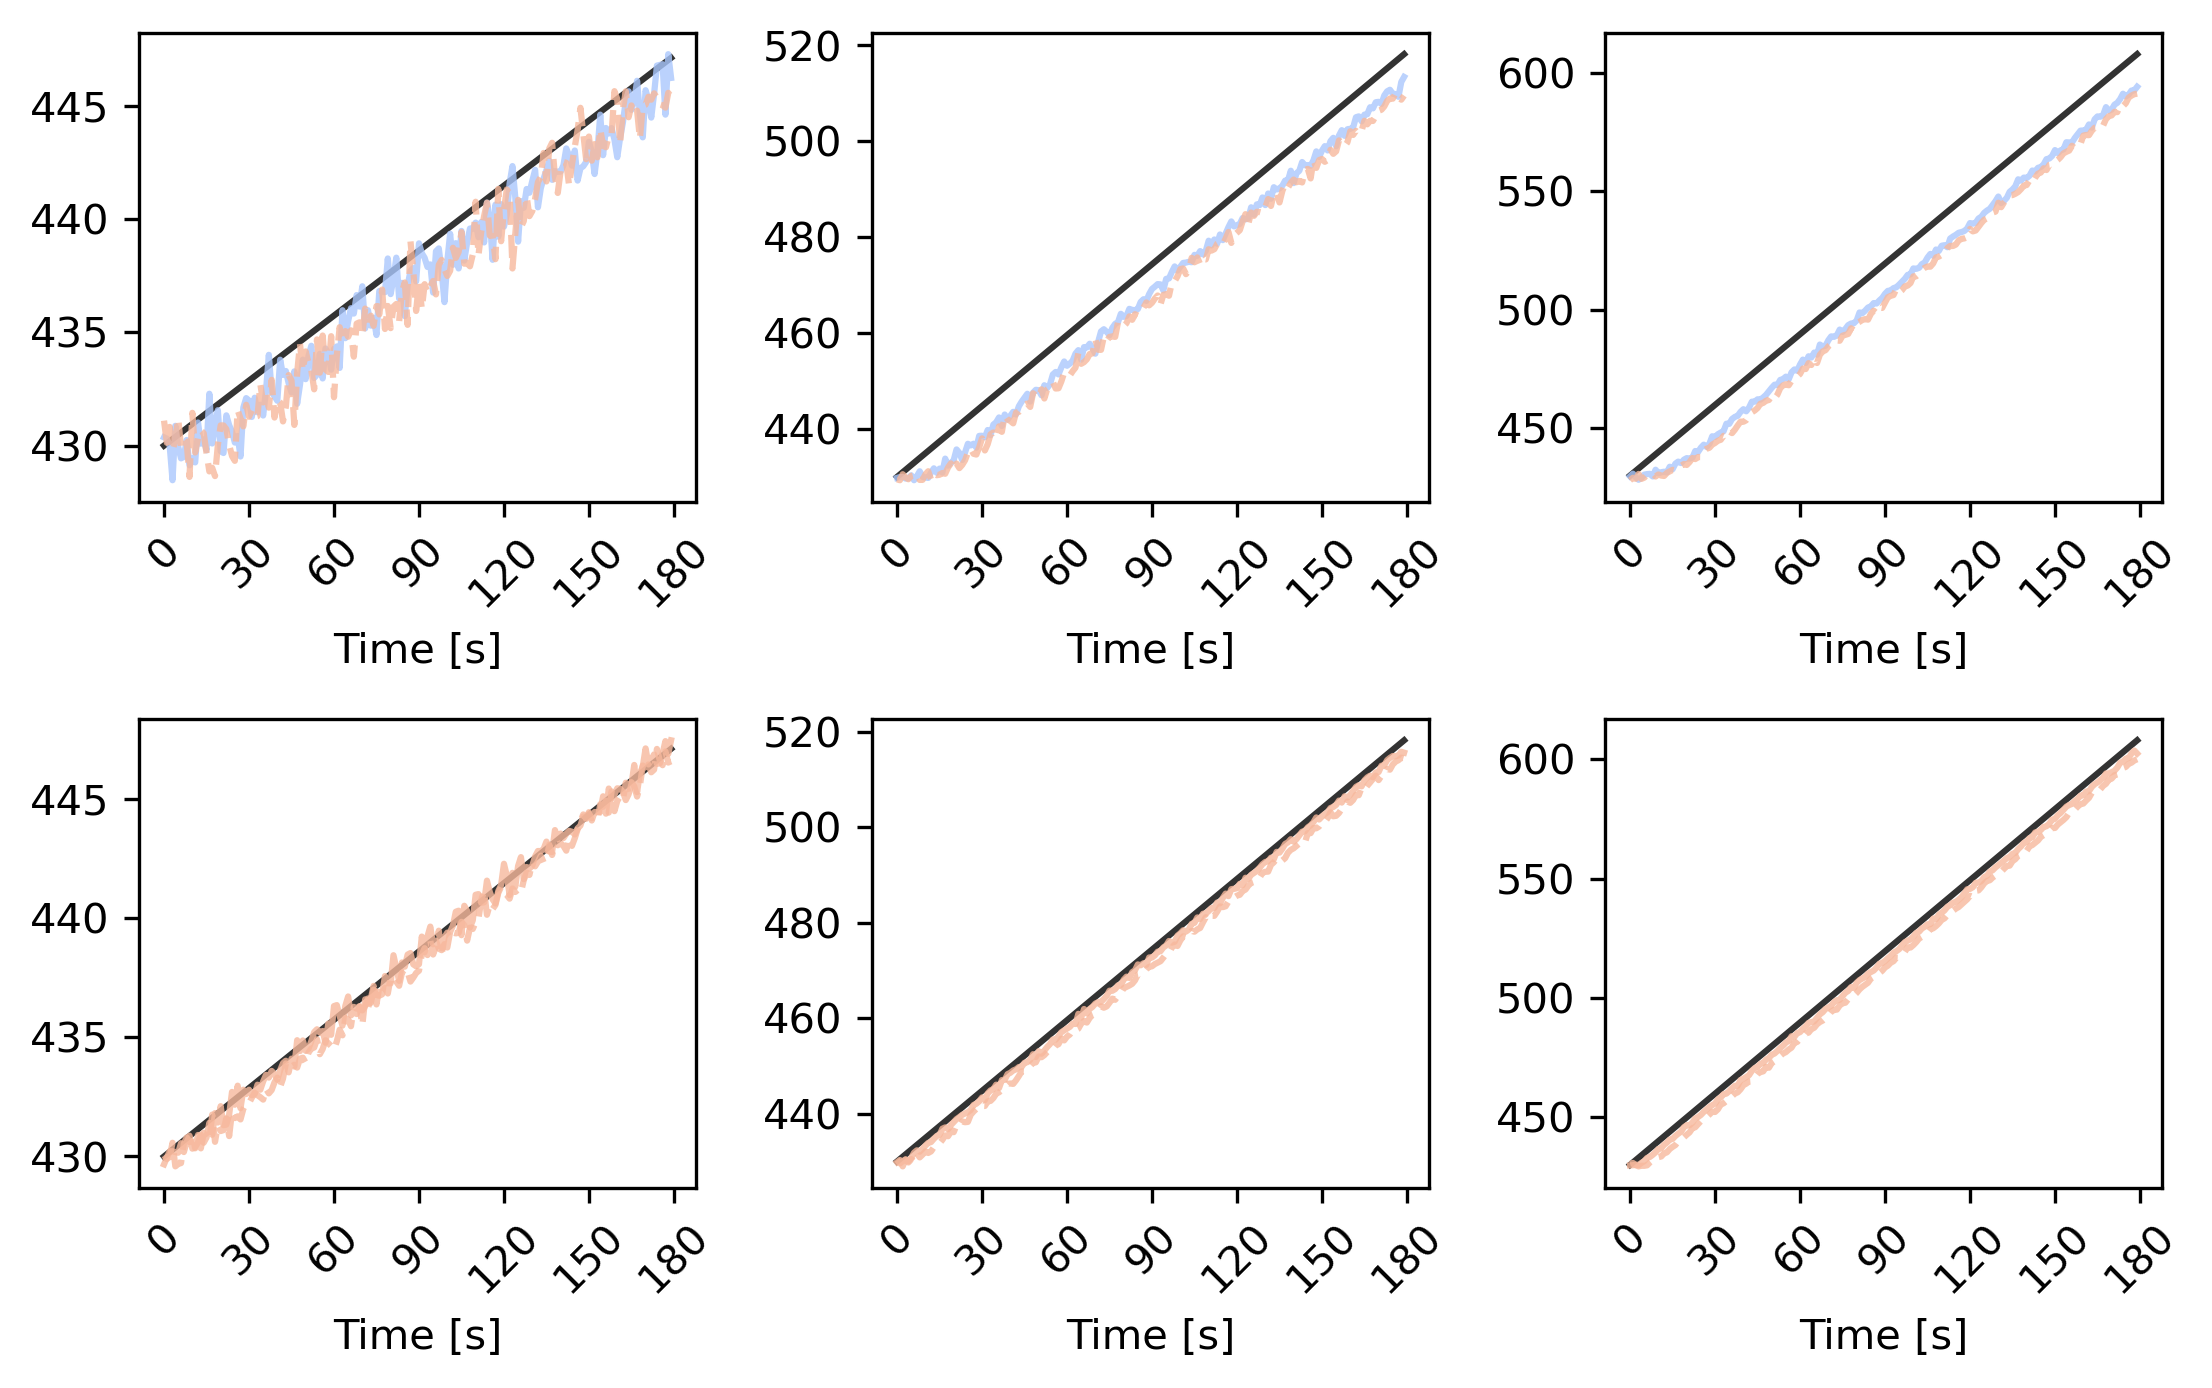

In [86]:
cm = 1/2.54  # centimeters in inches
# fig, ax = plt.subplots(2, 3, figsize=(19*cm, 12*cm), sharex=True)
for curvature in df_lowcost['curvature'].unique():
    fig, ax = plt.subplots(2, 3, figsize=(19*cm, 12*cm), dpi=300)
    for intensity in df_lowcost['intensity'].unique():
        if intensity == 'low':
            j=0
        elif intensity == 'medium':
            j=1
        elif intensity == 'high':
            j=2
        
        if curvature == 'straight':
            k=0
        elif curvature == 'big':
            k=1
        
        df_b = df_base.loc[~df_base['id'].str.endswith('_height30')].groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()
        df_l = df_lowcost.loc[~df_lowcost['id'].str.endswith('_height30')].groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()
        df_c = df_commercial.loc[~df_commercial['id'].str.endswith('_height30')].groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()

        df_l30 = df_lowcost.loc[df_lowcost['id'].str.endswith('_height30')].groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()
        df_c30 = df_commercial.loc[df_commercial['id'].str.endswith('_height30')].groupby(['intensity', 'curvature', 'datetime'])['k30_co2'].median()

        df_b.loc[
            df_b.index.get_level_values('intensity') == intensity,
            df_b.index.get_level_values('curvature') == curvature].plot(ax=ax[0,j],
                                                                        label=i, color='black', alpha=0.8)
        df_b.loc[
            df_b.index.get_level_values('intensity') == intensity,
            df_b.index.get_level_values('curvature') == curvature].plot(ax=ax[1,j],
                                                                        label=i, color='black', alpha=0.8)
        
        df_l.loc[
            df_l.index.get_level_values('intensity') == intensity,
            df_l.index.get_level_values('curvature') == curvature].plot(ax=ax[0,j],
                                                                        label=i, color=colors[0], alpha=0.8)
        df_c.loc[
            df_c.index.get_level_values('intensity') == intensity,
            df_c.index.get_level_values('curvature') == curvature].plot(ax=ax[1,j],
                                                                        label=i, color=colors[1], alpha=0.8)
        
        df_l30.loc[
            df_l30.index.get_level_values('intensity') == intensity,
            df_l30.index.get_level_values('curvature') == curvature].plot(ax=ax[0,j],
                                                                        label=i, color=colors[1], alpha=0.8, linestyle='--')
        df_c30.loc[
            df_c30.index.get_level_values('intensity') == intensity,
            df_c30.index.get_level_values('curvature') == curvature].plot(ax=ax[1,j],
                                                                        label=i, color=colors[1], alpha=0.8, linestyle='--')

        # (df_b.loc[
        #     df_b.index.get_level_values('intensity') == intensity,
        #     df_b.index.get_level_values('curvature') == curvature]-df_l30.loc[
        #     df_l30.index.get_level_values('intensity') == intensity,
        #     df_l30.index.get_level_values('curvature') == curvature]).plot(ax=ax[3,j],
        #                                                                 label=i, color='black', alpha=0.8, linestyle='--')
        # (df_b.loc[
        #     df_b.index.get_level_values('intensity') == intensity,
        #     df_b.index.get_level_values('curvature') == curvature]-df_l.loc[
        #     df_l.index.get_level_values('intensity') == intensity,
        #     df_l.index.get_level_values('curvature') == curvature]).plot(ax=ax[3,j],
        #                                                                 label=i, color='red', alpha=0.8, linestyle='--')


        ax[0,j].set_xticks(np.arange(0, 181, 30))
        ax[0,j].set_xticklabels(np.arange(0, 181, 30).astype(int), rotation=45)
        ax[0,j].set_xlabel('Time [s]')
        
        ax[1,j].set_xticks(np.arange(0, 181, 30))
        ax[1,j].set_xticklabels(np.arange(0, 181, 30).astype(int), rotation=45)
        ax[1,j].set_xlabel('Time [s]')
    fig.tight_layout()